In [ ]:
# =============================================================================
# Cell 1: Import Required Libraries
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR   
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [3]:
# =============================================================================
# Cell 2: Load Feature Engineering Results
# =============================================================================

# Load the saved train/test splits and feature info
with open('../src/models/train_test_splits.pkl', 'rb') as f:
    splits = pickle.load(f)

with open('../src/models/feature_info.pkl', 'rb') as f:
    feature_info = pickle.load(f)

print("Feature engineering results loaded!")
print(f"Available feature combinations: {list(splits.keys())}")
print(f"Class weights: {feature_info['class_weights']}")

Feature engineering results loaded!
Available feature combinations: ['tfidf_only', 'numerical_only', 'combined']
Class weights: {np.int64(1): np.float64(0.38278940027894004), np.int64(2): np.float64(3.1510907003444317), np.int64(3): np.float64(4.235493827160494), np.int64(4): np.float64(2.463734290843806), np.int64(5): np.float64(0.7001530612244898)}


In [4]:
# =============================================================================
# Cell 3: Define Model Evaluation Functions
# =============================================================================

def evaluate_regression_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Evaluate regression model performance
    Returns MAE, RMSE, and R² score
    """
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Calculate metrics
    train_mae = mean_absolute_error(y_train, y_pred_train)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    results = {
        'model_name': model_name,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'predictions': y_pred_test
    }
    
    return results

def plot_predictions(y_true, y_pred, model_name):
    """Plot actual vs predicted values"""
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([1, 5], [1, 5], 'r--', lw=2)
    plt.xlabel('Actual Rating')
    plt.ylabel('Predicted Rating')
    plt.title(f'{model_name}: Actual vs Predicted')
    plt.xlim(0.5, 5.5)
    plt.ylim(0.5, 5.5)
    plt.grid(True, alpha=0.3)
    plt.show()

In [5]:
# =============================================================================
# Cell 4: Start with Linear Regression Baseline
# =============================================================================

# Start with combined features (TF-IDF + numerical)
X_train = splits['combined']['X_train']
X_test = splits['combined']['X_test']
y_train = splits['combined']['y_train']
y_test = splits['combined']['y_test']

print(f"Using combined features: {X_train.shape[1]} features")
print(f"Training samples: {X_train.shape[0]}")
print(f"Test samples: {X_test.shape[0]}")

# Linear Regression as baseline
print("\n" + "="*50)
print("BASELINE MODEL: LINEAR REGRESSION")
print("="*50)

linear_model = LinearRegression()
linear_results = evaluate_regression_model(
    linear_model, X_train, X_test, y_train, y_test, "Linear Regression"
)

print(f"Linear Regression Results:")
print(f"Test MAE: {linear_results['test_mae']:.3f}")
print(f"Test RMSE: {linear_results['test_rmse']:.3f}")
print(f"Test R²: {linear_results['test_r2']:.3f}")

# Why Linear Regression?
print("\nWhy Linear Regression as baseline:")
print("1. Simple and interpretable")
print("2. Good starting point for text classification")
print("3. Works well with TF-IDF features")
print("4. Fast training and prediction")

Using combined features: 5010 features
Training samples: 10978
Test samples: 2745

BASELINE MODEL: LINEAR REGRESSION
Linear Regression Results:
Test MAE: 0.957
Test RMSE: 1.231
Test R²: 0.521

Why Linear Regression as baseline:
1. Simple and interpretable
2. Good starting point for text classification
3. Works well with TF-IDF features
4. Fast training and prediction


In [7]:
# =============================================================================
# Cell 5: Ridge Regression (L2 Regularization)
# =============================================================================

print("RIDGE REGRESSION (L2 REGULARIZATION)")

# Ridge regression prevents overfitting with many features
ridge_model = Ridge(alpha=1.0)
ridge_results = evaluate_regression_model(
    ridge_model, X_train, X_test, y_train, y_test, "Ridge Regression"
)

print(f"Ridge Regression Results:")
print(f"Test MAE: {ridge_results['test_mae']:.3f}")
print(f"Test RMSE: {ridge_results['test_rmse']:.3f}")
print(f"Test R²: {ridge_results['test_r2']:.3f}")

print("\nWhy Ridge Regression:")
print("1. Handles multicollinearity in TF-IDF features")
print("2. Prevents overfitting with many features")
print("3. L2 regularization shrinks coefficients")
print("4. More stable than linear regression")

RIDGE REGRESSION (L2 REGULARIZATION)
Ridge Regression Results:
Test MAE: 0.757
Test RMSE: 0.979
Test R²: 0.698

Why Ridge Regression:
1. Handles multicollinearity in TF-IDF features
2. Prevents overfitting with many features
3. L2 regularization shrinks coefficients
4. More stable than linear regression


In [9]:
# =============================================================================
# Cell 6: Random Forest Regression
# =============================================================================

print("\n" + "="*30)
print("RANDOM FOREST REGRESSION")
print("="*30)

# Random Forest can capture non-linear relationships
rf_model = RandomForestRegressor(n_estimators=30, max_depth=None,  random_state=42, n_jobs=-1)
rf_results = evaluate_regression_model(
    rf_model, X_train, X_test, y_train, y_test, "Random Forest"
)

print(f"Random Forest Results:")
print(f"Test MAE: {rf_results['test_mae']:.3f}")
print(f"Test RMSE: {rf_results['test_rmse']:.3f}")
print(f"Test R²: {rf_results['test_r2']:.3f}")

print("\nWhy Random Forest:")
print("1. Handles non-linear relationships")
print("2. Robust to outliers")
print("3. Feature importance analysis")
print("4. Less prone to overfitting")
print("5. Works well with mixed feature types")


RANDOM FOREST REGRESSION
Random Forest Results:
Test MAE: 0.771
Test RMSE: 1.110
Test R²: 0.611

Why Random Forest:
1. Handles non-linear relationships
2. Robust to outliers
3. Feature importance analysis
4. Less prone to overfitting
5. Works well with mixed feature types


In [10]:
# =============================================================================
# Cell 7: Support Vector Regression (SVR)
# =============================================================================

print("SUPPORT VECTOR REGRESSION (SVR)")

# SVR for non-linear patterns
# Using linear kernel first due to high-dimensional data
svr_model = SVR(kernel='linear', C=1.0)
svr_results = evaluate_regression_model(
    svr_model, X_train, X_test, y_train, y_test, "SVR Linear"
)

print(f"SVR Results:")
print(f"Test MAE: {svr_results['test_mae']:.3f}")
print(f"Test RMSE: {svr_results['test_rmse']:.3f}")
print(f"Test R²: {svr_results['test_r2']:.3f}")

print("\nWhy SVR:")
print("1. Effective in high-dimensional spaces")
print("2. Memory efficient")
print("3. Versatile with different kernels")
print("4. Good for text data")

SUPPORT VECTOR REGRESSION (SVR)
SVR Results:
Test MAE: 0.758
Test RMSE: 0.998
Test R²: 0.686

Why SVR:
1. Effective in high-dimensional spaces
2. Memory efficient
3. Versatile with different kernels
4. Good for text data


In [11]:
# =============================================================================
# Cell 8: K-Nearest Neighbors (KNN) Regression
# =============================================================================

print("K-NEAREST NEIGHBORS (KNN) REGRESSION")

# KNN for local patterns
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_results = evaluate_regression_model(
    knn_model, X_train, X_test, y_train, y_test, "KNN"
)

print(f"KNN Results:")
print(f"Test MAE: {knn_results['test_mae']:.3f}")
print(f"Test RMSE: {knn_results['test_rmse']:.3f}")
print(f"Test R²: {knn_results['test_r2']:.3f}")

print("\nWhy KNN:")
print("1. Non-parametric approach")
print("2. Captures local patterns")
print("3. Simple concept")
print("4. Good for similar review patterns")

K-NEAREST NEIGHBORS (KNN) REGRESSION
KNN Results:
Test MAE: 0.943
Test RMSE: 1.344
Test R²: 0.430

Why KNN:
1. Non-parametric approach
2. Captures local patterns
3. Simple concept
4. Good for similar review patterns


In [12]:
# =============================================================================
# Cell 9: Decision Tree Regression
# =============================================================================

print("DECISION TREE REGRESSION")

# Decision Tree for interpretability
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_results = evaluate_regression_model(
    dt_model, X_train, X_test, y_train, y_test, "Decision Tree"
)

print(f"Decision Tree Results:")
print(f"Test MAE: {dt_results['test_mae']:.3f}")
print(f"Test RMSE: {dt_results['test_rmse']:.3f}")
print(f"Test R²: {dt_results['test_r2']:.3f}")

print("\nWhy Decision Tree:")
print("1. Highly interpretable")
print("2. Handles non-linear relationships")
print("3. Can show decision rules")
print("4. No assumptions about data distribution")

DECISION TREE REGRESSION
Decision Tree Results:
Test MAE: 0.890
Test RMSE: 1.312
Test R²: 0.457

Why Decision Tree:
1. Highly interpretable
2. Handles non-linear relationships
3. Can show decision rules
4. No assumptions about data distribution


In [43]:
# =============================================================================
# Cell 10: Compare All Models
# =============================================================================

# Compile all results
all_results = [
    linear_results,
    ridge_results,
    rf_results,
    svr_results,
    knn_results,
    dt_results
]

# Create comparison DataFrame
comparison_df = pd.DataFrame([
    {
        'Model': result['model_name'],
        'Test MAE': result['test_mae'],
        'Test RMSE': result['test_rmse'],
        'Test R²': result['test_r2']
    }
    for result in all_results
])

print("\n" + "="*70)
print("MODEL COMPARISON RESULTS")
print("="*70)
print(comparison_df.round(3))


MODEL COMPARISON RESULTS
               Model  Test MAE  Test RMSE  Test R²
0  Linear Regression     0.957      1.231    0.521
1   Ridge Regression     0.757      0.979    0.698
2      Random Forest     0.771      1.110    0.611
3         SVR Linear     0.758      0.998    0.686
4                KNN     0.943      1.344    0.430
5      Decision Tree     0.890      1.312    0.457


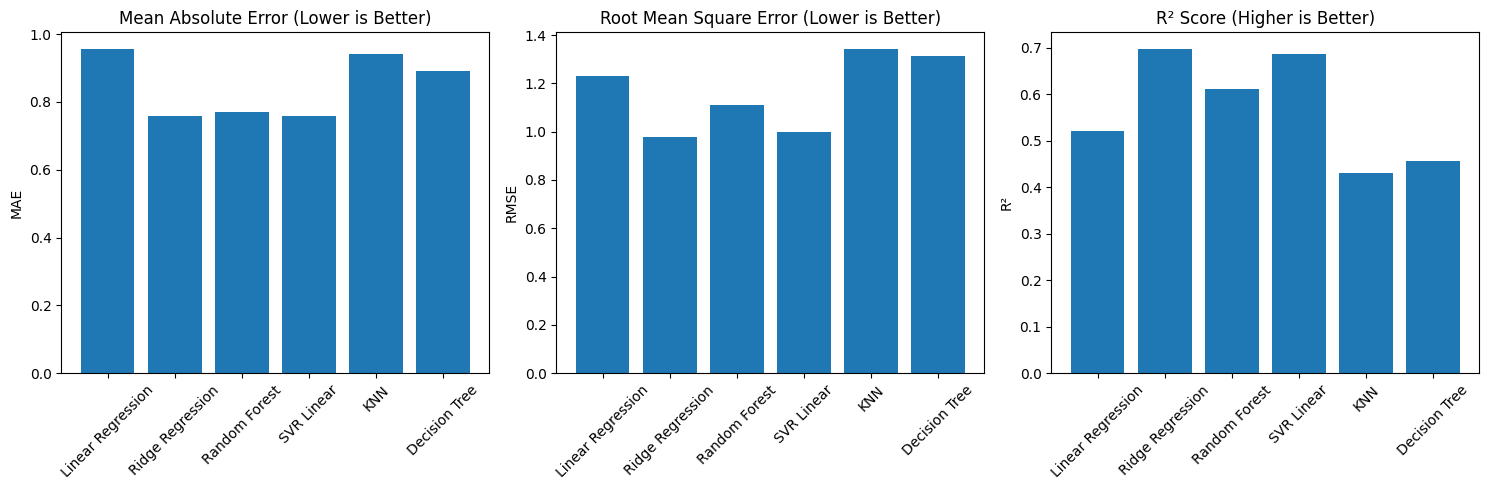

In [44]:
# =============================================================================
# Cell 11: Visualize Model Performance
# =============================================================================

# Create comparison plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# MAE comparison
axes[0].bar(comparison_df['Model'], comparison_df['Test MAE'])
axes[0].set_title('Mean Absolute Error (Lower is Better)')
axes[0].set_ylabel('MAE')
axes[0].tick_params(axis='x', rotation=45)

# RMSE comparison
axes[1].bar(comparison_df['Model'], comparison_df['Test RMSE'])
axes[1].set_title('Root Mean Square Error (Lower is Better)')
axes[1].set_ylabel('RMSE')
axes[1].tick_params(axis='x', rotation=45)

# R² comparison
axes[2].bar(comparison_df['Model'], comparison_df['Test R²'])
axes[2].set_title('R² Score (Higher is Better)')
axes[2].set_ylabel('R²')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


BEST MODEL: Ridge Regression
Best MAE: 0.757


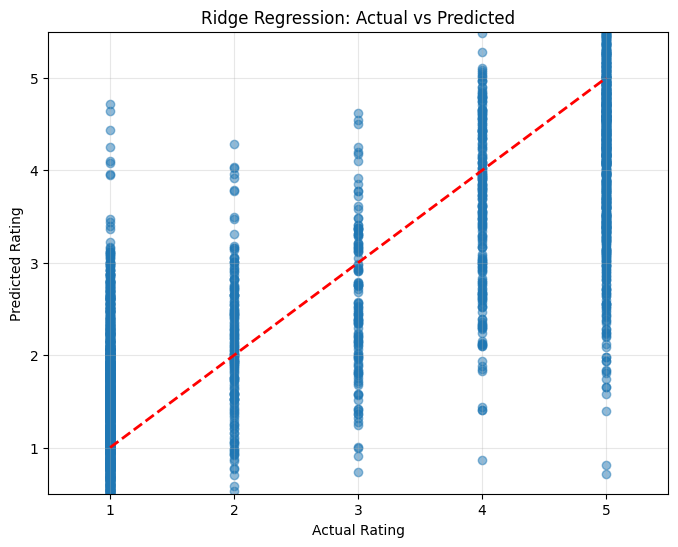

In [45]:
# =============================================================================
# Cell 12: Best Model Analysis
# =============================================================================

# Find best model by MAE (most interpretable metric)
best_model_idx = comparison_df['Test MAE'].idxmin()
best_model_name = comparison_df.loc[best_model_idx, 'Model']
best_mae = comparison_df.loc[best_model_idx, 'Test MAE']

print(f"\nBEST MODEL: {best_model_name}")
print(f"Best MAE: {best_mae:.3f}")

# Plot predictions for best model
best_result = all_results[best_model_idx]
plot_predictions(y_test, best_result['predictions'], best_model_name)


In [46]:
# =============================================================================
# Cell 13: Feature Combination Comparison
# =============================================================================

print("\n" + "="*50)
print("FEATURE COMBINATION COMPARISON")
print("="*50)

# Test best model with different feature combinations
feature_comparison = {}

for feature_type in ['tfidf_only', 'numerical_only', 'combined']:
    X_tr = splits[feature_type]['X_train']
    X_te = splits[feature_type]['X_test']
    y_tr = splits[feature_type]['y_train']
    y_te = splits[feature_type]['y_test']
    
    # Train best model with this feature combination
    if best_model_name == "Random Forest":
        model = RandomForestRegressor(n_estimators=100, random_state=42)
    elif best_model_name == "Ridge Regression":
        model = Ridge(alpha=1.0)
    elif best_model_name == "Linear Regression":
        model = LinearRegression()
    elif best_model_name == "SVR Linear":
        model = SVR(kernel='linear', C=1.0)
    elif best_model_name == "KNN":
        model = KNeighborsRegressor(n_neighbors=5)
    else:  # Decision Tree
        model = DecisionTreeRegressor(max_depth=10, random_state=42)
    
    results = evaluate_regression_model(model, X_tr, X_te, y_tr, y_te, feature_type)
    feature_comparison[feature_type] = results

# Compare feature combinations
print(f"Feature combination comparison for {best_model_name}:")
for feature_type, results in feature_comparison.items():
    print(f"{feature_type}: MAE={results['test_mae']:.3f}, R²={results['test_r2']:.3f}")


FEATURE COMBINATION COMPARISON
Feature combination comparison for Ridge Regression:
tfidf_only: MAE=0.783, R²=0.679
numerical_only: MAE=1.101, R²=0.412
combined: MAE=0.757, R²=0.698


In [47]:
# =============================================================================
# Cell 14: Cross-Validation Analysis
# =============================================================================

print("\n" + "="*50)
print("CROSS-VALIDATION ANALYSIS")
print("="*50)

# Perform 5-fold cross-validation on best model
if best_model_name == "Random Forest":
    cv_model = RandomForestRegressor(n_estimators=100, random_state=42)
elif best_model_name == "Ridge Regression":
    cv_model = Ridge(alpha=1.0)
elif best_model_name == "Linear Regression":
    cv_model = LinearRegression()
elif best_model_name == "SVR Linear":
    cv_model = SVR(kernel='linear', C=1.0)
elif best_model_name == "KNN":
    cv_model = KNeighborsRegressor(n_neighbors=5)
else:  # Decision Tree
    cv_model = DecisionTreeRegressor(max_depth=10, random_state=42)

# Cross-validation scores
cv_mae_scores = cross_val_score(cv_model, X_train, y_train, 
                                cv=5, scoring='neg_mean_absolute_error')
cv_mae_scores = -cv_mae_scores  # Convert to positive

cv_r2_scores = cross_val_score(cv_model, X_train, y_train, 
                               cv=5, scoring='r2')

print(f"Cross-validation MAE: {cv_mae_scores.mean():.3f} (+/- {cv_mae_scores.std() * 2:.3f})")
print(f"Cross-validation R²: {cv_r2_scores.mean():.3f} (+/- {cv_r2_scores.std() * 2:.3f})")

print("\nWhy Cross-Validation:")
print("1. More robust performance estimate")
print("2. Reduces overfitting bias")
print("3. Uses all data for training and testing")
print("4. Provides confidence intervals")


CROSS-VALIDATION ANALYSIS
Cross-validation MAE: 0.777 (+/- 0.018)
Cross-validation R²: 0.684 (+/- 0.014)

Why Cross-Validation:
1. More robust performance estimate
2. Reduces overfitting bias
3. Uses all data for training and testing
4. Provides confidence intervals


In [48]:
# =============================================================================
# Cell 15: Hyperparameter Tuning for Best Model
# =============================================================================

print("\n" + "="*50)
print("HYPERPARAMETER TUNING")
print("="*50)

# Hyperparameter tuning for best model
if best_model_name == "Random Forest":
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10]
    }
    tuning_model = RandomForestRegressor(random_state=42)
    
elif best_model_name == "Ridge Regression":
    param_grid = {
        'alpha': [0.1, 1.0, 10.0, 100.0]
    }
    tuning_model = Ridge()
    
elif best_model_name == "SVR Linear":
    param_grid = {
        'C': [0.1, 1.0, 10.0, 100.0]
    }
    tuning_model = SVR(kernel='linear')
    
elif best_model_name == "KNN":
    param_grid = {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance']
    }
    tuning_model = KNeighborsRegressor()
    
else:  # Decision Tree or Linear Regression
    param_grid = {
        'max_depth': [5, 10, 15, 20, None],
        'min_samples_split': [2, 5, 10]
    }
    tuning_model = DecisionTreeRegressor(random_state=42)

# Grid search with cross-validation
grid_search = GridSearchCV(
    tuning_model, param_grid, 
    cv=5, scoring='neg_mean_absolute_error',
    n_jobs=-1, verbose=1
)

print(f"Starting hyperparameter tuning for {best_model_name}...")
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV MAE: {-grid_search.best_score_:.3f}")


HYPERPARAMETER TUNING
Starting hyperparameter tuning for Ridge Regression...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters: {'alpha': 1.0}
Best CV MAE: 0.777


In [49]:
# =============================================================================
# Cell 16: Final Model Performance
# =============================================================================

print("FINAL OPTIMIZED MODEL PERFORMANCE")

# Train final model with best parameters
final_model = grid_search.best_estimator_
final_results = evaluate_regression_model(
    final_model, X_train, X_test, y_train, y_test, 
    f"Optimized {best_model_name}"
)

print(f"Final Model Results:")
print(f"Test MAE: {final_results['test_mae']:.3f}")
print(f"Test RMSE: {final_results['test_rmse']:.3f}")
print(f"Test R²: {final_results['test_r2']:.3f}")

# Compare with original best model
original_mae = best_result['test_mae']
improvement = ((original_mae - final_results['test_mae']) / original_mae) * 100

print(f"\nImprovement from hyperparameter tuning:")
print(f"Original MAE: {original_mae:.3f}")
print(f"Optimized MAE: {final_results['test_mae']:.3f}")
print(f"Improvement: {improvement:.1f}%")

FINAL OPTIMIZED MODEL PERFORMANCE
Final Model Results:
Test MAE: 0.757
Test RMSE: 0.979
Test R²: 0.698

Improvement from hyperparameter tuning:
Original MAE: 0.757
Optimized MAE: 0.757
Improvement: 0.0%


RESIDUAL ANALYSIS


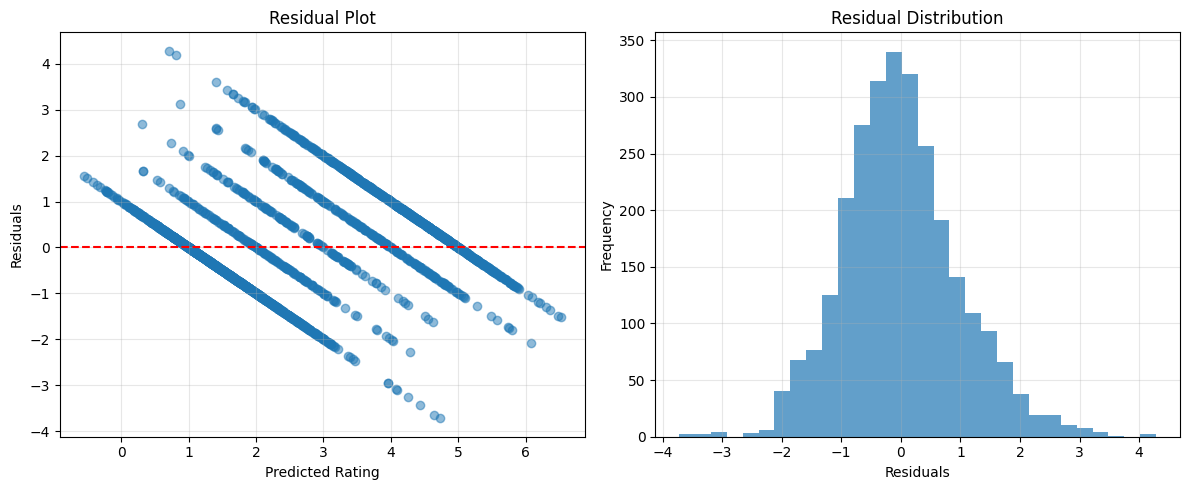

Residual mean: 0.005
Residual std: 0.979
Mean absolute residual: 0.757


In [50]:
# =============================================================================
# Cell 17: Model Residual Analysis
# =============================================================================

print("RESIDUAL ANALYSIS")

# Calculate residuals
residuals = y_test - final_results['predictions']

# Plot residuals
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Residual plot
axes[0].scatter(final_results['predictions'], residuals, alpha=0.5)
axes[0].axhline(y=0, color='r', linestyle='--')
axes[0].set_xlabel('Predicted Rating')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Residual Plot')
axes[0].grid(True, alpha=0.3)

# Residual histogram
axes[1].hist(residuals, bins=30, alpha=0.7)
axes[1].set_xlabel('Residuals')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Residual Distribution')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Residual statistics
print(f"Residual mean: {residuals.mean():.3f}")
print(f"Residual std: {residuals.std():.3f}")
print(f"Mean absolute residual: {np.abs(residuals).mean():.3f}")

In [51]:
# =============================================================================
# Cell 18: Feature Importance Analysis
# =============================================================================

print("\n" + "="*50)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*50)
print(type(final_model))
# Feature importance for tree-based models
if hasattr(final_model, 'feature_importances_'):
    # Get feature names
    feature_names = (feature_info['tfidf_features'] + 
                    feature_info['numerical_features'])
    
    # Get feature importances
    importances = final_model.feature_importances_
    
    # Create feature importance DataFrame
    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False)
    
    # Plot top 20 features
    plt.figure(figsize=(10, 8))
    top_features = feature_importance_df.head(20)
    plt.barh(top_features['feature'], top_features['importance'])
    plt.xlabel('Importance')
    plt.title('Top 20 Feature Importances')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print("Top 10 most important features:")
    print(feature_importance_df.head(10))
    
else:
    print("Feature importance not available for this model type")



FEATURE IMPORTANCE ANALYSIS
<class 'sklearn.linear_model._ridge.Ridge'>
Feature importance not available for this model type



ERROR ANALYSIS BY RATING
Error analysis by actual rating:
              absolute_error             
                        mean    std count
actual_rating                            
1                      0.677  0.548  1434
2                      0.618  0.480   174
3                      0.777  0.548   130
4                      0.815  0.606   223
5                      0.914  0.743   784


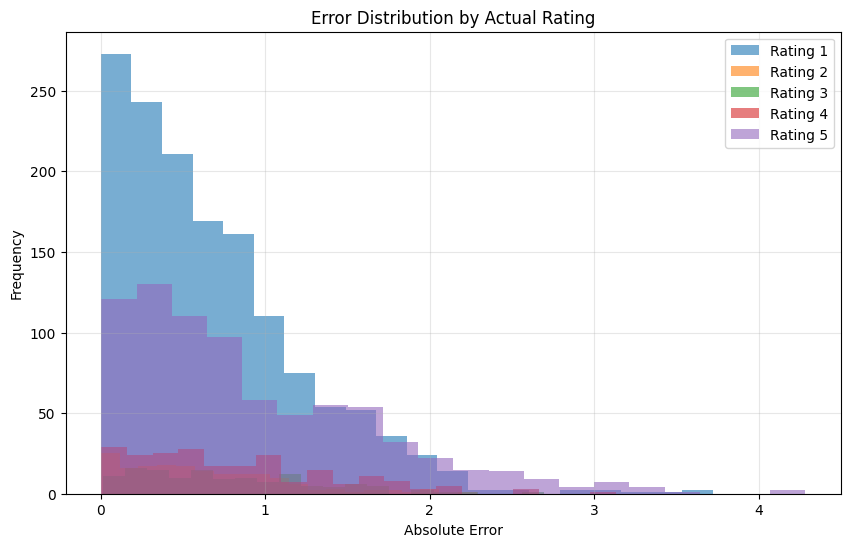

In [52]:
# =============================================================================
# Cell 19: Error Analysis by Rating
# =============================================================================

print("\n" + "="*50)
print("ERROR ANALYSIS BY RATING")
print("="*50)

# Analyze errors by actual rating
error_by_rating = pd.DataFrame({
    'actual_rating': y_test,
    'predicted_rating': final_results['predictions'],
    'absolute_error': np.abs(y_test - final_results['predictions'])
})

# Group by actual rating
rating_analysis = error_by_rating.groupby('actual_rating').agg({
    'absolute_error': ['mean', 'std', 'count']
}).round(3)

print("Error analysis by actual rating:")
print(rating_analysis)

# Plot error distribution by rating
plt.figure(figsize=(10, 6))
for rating in sorted(y_test.unique()):
    rating_errors = error_by_rating[error_by_rating['actual_rating'] == rating]['absolute_error']
    plt.hist(rating_errors, bins=20, alpha=0.6, label=f'Rating {int(rating)}')

plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.title('Error Distribution by Actual Rating')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [56]:
# =============================================================================
# Cell 20: Save Final Model
# =============================================================================

print("\n" + "="*50)
print("SAVING FINAL MODEL")
print("="*50)

# Save the final optimized model
# import os
# os.makedirs('../src/models', exist_ok=True)

# Save model results
model_results = {
    'best_model_name': f"Optimized {best_model_name}",
    'best_params': grid_search.best_params_,
    'test_mae': final_results['test_mae'],
    'test_rmse': final_results['test_rmse'],
    'test_r2': final_results['test_r2'],
    'cv_mae_mean': cv_mae_scores.mean(),
    'cv_mae_std': cv_mae_scores.std(),
    'feature_combination': 'combined'
}

# Save models
with open("../src/models/final_model.pkl", "wb") as f:
    pickle.dump(final_model, f)

with open("../src/models/final_model_results.pkl", "wb") as f:
    pickle.dump(final_results, f)

with open("../src/models/best_model.pkl", "wb") as f:
    pickle.dump(model_results, f)

with open("../src/models/model_comparison_results.pkl", "wb") as f:
    pickle.dump(all_results, f)

print("Final model saved successfully!")
print(f"Model type: {model_results['best_model_name']}")
print(f"Best parameters: {model_results['best_params']}")
print(f"Final MAE: {model_results['test_mae']:.3f}")


SAVING FINAL MODEL
Final model saved successfully!
Model type: Optimized Ridge Regression
Best parameters: {'alpha': 1.0}
Final MAE: 0.757


In [57]:
# =============================================================================
# Cell 21: Model Summary and Conclusions
# =============================================================================

print("\n" + "="*70)
print("MODEL DEVELOPMENT SUMMARY")
print("="*70)

print("\n1. Models Tested:")
for result in all_results:
    print(f"   - {result['model_name']}: MAE={result['test_mae']:.3f}")

print(f"\n2. Best Model: {best_model_name}")
print(f"   - Original MAE: {best_result['test_mae']:.3f}")
print(f"   - Optimized MAE: {final_results['test_mae']:.3f}")
print(f"   - Improvement: {improvement:.1f}%")

print(f"\n3. Final Performance:")
print(f"   - MAE: {final_results['test_mae']:.3f}")
print(f"   - RMSE: {final_results['test_rmse']:.3f}")
print(f"   - R²: {final_results['test_r2']:.3f}")

print(f"\n4. Cross-validation:")
print(f"   - CV MAE: {cv_mae_scores.mean():.3f} (+/- {cv_mae_scores.std() * 2:.3f})")

print("\n5. Key Insights:")
if best_model_name == "Random Forest":
    print("   - Random Forest performed best")
    print("   - Handles non-linear relationships well")
    print("   - Robust to outliers in review text")
elif best_model_name == "Ridge Regression":
    print("   - Ridge Regression performed best")
    print("   - Good for high-dimensional text data")
    print("   - Regularization prevents overfitting")
elif best_model_name == "SVR Linear":
    print("   - SVR performed best")
    print("   - Effective for text classification")
    print("   - Memory efficient for large datasets")

print("\n6. Why Regression over Classification:")
print("   - Ratings are continuous values (1-5)")
print("   - Preserves rating scale information")
print("   - MAE directly interpretable as rating error")
print("   - Better for predicting exact ratings")

print("\nModel development completed successfully!")


MODEL DEVELOPMENT SUMMARY

1. Models Tested:
   - Linear Regression: MAE=0.957
   - Ridge Regression: MAE=0.757
   - Random Forest: MAE=0.771
   - SVR Linear: MAE=0.758
   - KNN: MAE=0.943
   - Decision Tree: MAE=0.890

2. Best Model: Ridge Regression
   - Original MAE: 0.757
   - Optimized MAE: 0.757
   - Improvement: 0.0%

3. Final Performance:
   - MAE: 0.757
   - RMSE: 0.979
   - R²: 0.698

4. Cross-validation:
   - CV MAE: 0.777 (+/- 0.018)

5. Key Insights:
   - Ridge Regression performed best
   - Good for high-dimensional text data
   - Regularization prevents overfitting

6. Why Regression over Classification:
   - Ratings are continuous values (1-5)
   - Preserves rating scale information
   - MAE directly interpretable as rating error
   - Better for predicting exact ratings

Model development completed successfully!
